# Programming Assignment: Выбор числа соседей

In this task, you need to select the optimal value of k for the KNN algorithm. We will use the Wine data set, where we need to predict the grape variety from which the wine is made using the results of chemical analyzes.

В этом задании вам нужно подобрать оптимальное значение k для алгоритма kNN. Будем использовать набор данных Wine, где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов.

In [1]:
import numpy as np
import pandas
from lib.helpersmd import write_to_file

1- Download the Wine sample at https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (the file is also attached to this task)

2- Extract the attributes and classes from the data. The class is written in the first column (three variants), the features are in the columns from the second to the last. 

More information about the essence of the features can be found at https://archive.ics.uci.edu/ml/datasets/Wine (see also the wine.names file attached to the task)

    1- Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (файл также приложен к этому заданию)

    2- Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний. Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл wine.names, приложенный к заданию)


In [2]:
#1 load dataset , split X,Y
data=pandas.read_csv('wine.data',header=None)
#2
data=data.as_matrix(columns=None)
y=data[:,0]
X=data[:,1:]

3- Quality assessment should be carried out by cross-validation in 5 blocks (5-fold). Create a splitter generator that mixes the selection before forming the blocks (shuffle = True). To reproduce the result, create a KFold generator with a fixed parameter random_state = 42. As a measure of quality, use the proportion of correct answers (accuracy).

4- Find the classification accuracy for cross-validation for the nearest neighbor method (sklearn.neighbors.KNeighborsClassifier), for k from 1 to 50. At which k did the optimal quality get? What is it equal to (a number in the range from 0 to 1)? These results will be answers to questions 1 and 2.

    3- Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

    4- Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

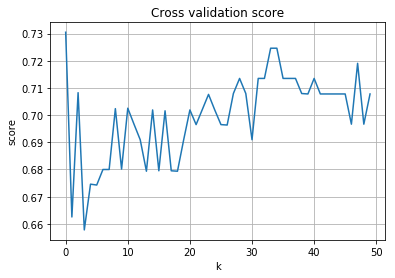

In [6]:
#  3.  Cross validation iterators
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#shuffle=True for randomly mixing objects of the sample
cv = KFold(n_splits=5,shuffle=True,random_state=42)
#for train, test in kf.split(X):
#     print("%s %s" % (train, test))

#4
val_max=0
k_max=0
score_values=[]
for k in range(1,51): #(1,51):
    clf = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(clf,X,y,cv=cv).mean()
    score_values.append(score)
    if score>val_max:
        val_max=score
        k_max=k

import matplotlib.pyplot as plt
plt.figure()
plt.plot(score_values)
plt.xlabel("k")
plt.ylabel("score")
plt.title("Cross validation score")
plt.grid()
plt.show()
"""
    #this my implementation for cross_val_score
    S=0
    for train, test in cv.split(X):
        # print("%s %s" % (train, test))
        Xtrain=X[train]
        ytrain=y[train]
        Xtest=X[test]
        ytest=y[test]
        
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(Xtrain, ytrain)
        
        val=sum(neigh.predict(Xtest)==ytest)/float(len(ytest))
        S+=val
    S/=5
    print sm1,S
    if S>val_max:
        val_max=S
        k_max=k
    """
write_to_file(k_max,"week%d-A%dT%d.out"%(2,1,1))
write_to_file(val_max,"week%d-A%dT%d.out"%(2,1,2))

5- Scale the characteristics using the function sklearn.preprocessing.scale. Find the optimal k for cross-validation again.

6- What is the optimal value of k after bringing the characteristics to the same scale? Answer the questions 3 and 4. Did the scaling of the signs help?

    5- Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.

    6- Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Приведите ответы на вопросы 3 и 4. Помогло ли масштабирование признаков?


In [9]:
#5 
from sklearn.preprocessing import scale
X_norm=scale(X,with_mean=True,with_std=True)

#6
val_max=0
k_max=0
for k in range(1,51): #(1,51):
    clf = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(clf,X,y,cv=cv).mean()
    if score>val_max:
        val_max=score
        k_max=k
        
write_to_file(k_max,"week%d-A%dT%d.out"%(2,1,3))
write_to_file(val_max,"week%d-A%dT%d.out"%(2,1,4))
